# UNSW-NB15 Dataset Analysis

## UNSW-NB15 Data Description

The UNSW-NB15 dataset contains information about network connections and attacks. It includes different variables such as source and destination IP address, ports, protocols, durations, etc.
The distribution of classes shows an unequal distribution of attacks compared to normal connections.
The correlation graph highlights the relationships between the variables. Some attributes can be highly correlated, which can be useful for detecting attacks.
The additional charts illustrate different visualizations to explore the data in depth.

### 1 . Install the necessary tools

In [1]:
# Install Kaggle API
# Install shap biblio
!pip install kaggle
!pip install secure-smtplib

### 2 . Import the libraries

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#Biblio prevention
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

### 3 . Download UNSW_NB15 dataset from Kaggle API

In [3]:
# Upload kaggle.json
from google.colab import files
uploaded = pd.read_csv("/content/kaggle.json")

# Move kaggle.json to the correct directory and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Create the directory to save the datasets
!mkdir UNSW_NB15Data

# Download multiple datasets by specifying the dataset owner and name in the list below
datasets = [
    "elmehdi23/unsw-nb15"
]

for dataset in datasets:
    !kaggle datasets download -d {dataset} -p UNSW_NB15Data
    !unzip UNSW_NB15Data/{dataset.split("/")[-1]}.zip -d UNSW_NB15Data

 87% 129M/149M [00:01<00:00, 91.4MB/s]
100% 149M/149M [00:01<00:00, 98.7MB/s]
Archive:  UNSW_NB15Data/unsw-nb15.zip
  inflating: UNSW_NB15Data/NUSW-NB15_features.csv  
  inflating: UNSW_NB15Data/UNSW-NB15_1.csv  
  inflating: UNSW_NB15Data/UNSW-NB15_2.csv  
  inflating: UNSW_NB15Data/UNSW-NB15_3.csv  
  inflating: UNSW_NB15Data/UNSW-NB15_4.csv  
  inflating: UNSW_NB15Data/UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15Data/UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15Data/UNSW_NB15_training-set.csv  


### 4 . Understanding UNSW_NB15 data

### 4.1 Read the three files Training(UNSW_NB15_training-set) - Testing(UNSW_NB15_testing-set) and the first partition of the datset UNSW_NB15(UNSW-NB15_1.csv) and view their dimension.

In [4]:
df_train = pd.read_csv("/content/UNSW_NB15Data/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("/content/UNSW_NB15Data/UNSW_NB15_testing-set.csv")
df_first_partition = pd.read_csv("/content/UNSW_NB15Data/UNSW-NB15_1.csv")
print('features of first partition of UNSW-NB_15 are : ', df_first_partition.shape)
print('featres of training and testing UNSWB-NB_15 are : ', df_train.shape, df_test.shape)

<ipython-input-4-b98ea0b0c796>:3: DtypeWarning: Columns (1,3,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_first_partition = pd.read_csv("/content/UNSW_NB15Data/UNSW-NB15_1.csv")


features of first partition of UNSW-NB_15 are :  (700000, 49)
featres of training and testing UNSWB-NB_15 are :  (82332, 45) (175341, 45)


### 4.2 Checking the column numbers for Training-Testing files

In [5]:
all(df_train.columns == df_test.columns)

True

### 4.3 Display Training - Testing and the first UNSW_NB15 dataset partition

###### Training set

In [6]:
df_train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


##### Testing set

In [7]:
df_test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


##### First Partition set

In [8]:
df_first_partition.head()

,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0.17,3,7,1,3.1,1.1,1.2,1.3,Unnamed: 47,0.18
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


We notice the absence of the entet for this first partition, what it does that we will have to add the entet for the file UNSW-NB15_1.csv

### 4.4 Adding entete for UNSW-NB15_1 partitioned file

In [9]:
import csv

# Nom du fichier CSV à lire
nom_fichier = "/content/UNSW_NB15Data/UNSW-NB15_1.csv"

# Définir les en-têtes
noms_colonnes = ["srcip", "sport", "dstip", "dsport", "proto", "state", "dur", "sbytes", "dbytes", "sttl", "dttl", "sloss", "dloss", "service", "Sload", "Dload", "Spkts",
                 "Dpkts","swin", "dwin", "stcpb", "dtcpb", "meansz", "dmeansz", "trans_depth", "res_bdy_len", "Sjit","Djit", "Stime", "Ltime", "Sintpkt", "Dintpkt", "tcprtt",
                 "synack", "ackdat", "is_sm_ips_ports", "ct_state_ttl", "ct_flw_http_mthd", "is_ftp_login", "ct_ftp_cmd", "ct_srv_src", "ct_srv_dst", "ct_dst_ltm", "ct_src_ltm",
                 "ct_src_dport_ltm", "ct_dst_sport_ltm", "ct_dst_src_ltm", "attack_cat", "Label"]

# Ouvrir le fichier CSV en mode lecture
with open(nom_fichier, 'r') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv)
    lignes = list(lecteur_csv)

# Insérer les en-têtes au début de la liste des lignes
lignes.insert(0, noms_colonnes)

# Nom du fichier CSV de sortie
nom_fichier_sortie = "/content/UNSW_NB15Data/New_UNSW-NB15_1.csv"

# Ouvrir le fichier CSV en mode écriture
with open(nom_fichier_sortie, 'w', newline='') as fichier_csv_sortie:
    writer_csv = csv.writer(fichier_csv_sortie)
    writer_csv.writerows(lignes)

print("En-têtes ajoutés avec succès au fichier CSV de sortie :", nom_fichier_sortie)


En-têtes ajoutés avec succès au fichier CSV de sortie : /content/UNSW_NB15Data/New_UNSW-NB15_1.csv


### 4.5 Reading and Viewing New New_UNSW-NB15_1.csv File

In [10]:
df_first_partition = pd.read_csv("/content/UNSW_NB15Data/New_UNSW-NB15_1.csv", dtype = {'sport':str, 'dsport':str, 'attack_cat':str})

In [11]:
df_first_partition.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,﻿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


### 4.6 First partition column information; df_first_partition

In [12]:
df_first_partition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

### 4.7 df_train concatenation with df_test

In order to ensure the balance between the learning and testing sets and avoid treatment twice, we decided to concatenate them into a single data frame and then re-target them with a different ratio later with sklearn.model_selection.train_test_split().

In [13]:
df_concat = pd.concat([df_train, df_test])
# information about the concat dataset
df_concat.info()
print('Lenght of dataframe df_concat :',len(df_concat))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

### 4.8 Displaying the new concatenar dataframe and discusses some operations

In [14]:
df_concat.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


Let’s add the columns [srcip, sport, dstip, dsport] to our dataframe df_concat, we will need them later.

In [15]:
# Ajoutons les colonnes souhaitent dans df_concat
df_concat.insert(1, 'srcip', "")
df_concat.insert(2, 'sport', "")
df_concat.insert(3, 'dstip', "")
df_concat.insert(4, 'dsport', "")
# Afficher le nouveau DataFrame avec les colonnes ajoutées au début
df_concat.head()

,id,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,,,,,0.000011,udp,-,INT,2,...,1,2,0,0,0,1,2,0,Normal,0
1,2,,,,,0.000008,udp,-,INT,2,...,1,2,0,0,0,1,2,0,Normal,0
2,3,,,,,0.000005,udp,-,INT,2,...,1,3,0,0,0,1,3,0,Normal,0
3,4,,,,,0.000006,udp,-,INT,2,...,1,3,0,0,0,2,3,0,Normal,0
4,5,,,,,0.000010,udp,-,INT,2,...,1,3,0,0,0,2,3,0,Normal,0


Filling ['srcip' ,'sport', 'dstip', 'dsport'] to the new df_concat dataframe from the First partition New_UNSW-NB15_1.csv

In [16]:
# Déterminer le nombre de lignes à copier
nb_lignes = 257673

# Créer un DataFrame cible a partir df_concat
df_cible = df_concat

# Copier les 'nb_lignes' premières lignes des colonnes 'srcip' et 'srcip', 'dstip', 'dsport' du DataFrame source vers le DataFrame cible
df_cible['srcip'] = df_first_partition['srcip'].iloc[:nb_lignes]
df_cible['sport'] = df_first_partition['sport'].iloc[:nb_lignes]
df_cible['dstip'] = df_first_partition['dstip'].iloc[:nb_lignes]
df_cible['dsport'] = df_first_partition['dsport'].iloc[:nb_lignes]
# Afficher le DataFrame cible avec les colonnes copiées
df_cible.head()

,id,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,﻿59.166.0.0,1390,149.171.126.6,53,0.000011,udp,-,INT,2,...,1,2,0,0,0,1,2,0,Normal,0
1,2,59.166.0.0,33661,149.171.126.9,1024,0.000008,udp,-,INT,2,...,1,2,0,0,0,1,2,0,Normal,0
2,3,59.166.0.6,1464,149.171.126.7,53,0.000005,udp,-,INT,2,...,1,3,0,0,0,1,3,0,Normal,0
3,4,59.166.0.5,3593,149.171.126.5,53,0.000006,udp,-,INT,2,...,1,3,0,0,0,2,3,0,Normal,0
4,5,59.166.0.3,49664,149.171.126.0,53,0.000010,udp,-,INT,2,...,1,3,0,0,0,2,3,0,Normal,0


### 4.9 Checking the number of unique values for all object types

In [17]:
#Vérification le nombre de valeurs uniques
df_cible.select_dtypes(include='object').nunique()

srcip            40
sport         58526
dstip            42
dsport        34541
proto           133
service          13
state            11
attack_cat       10
dtype: int64

### 4.10 Verification of Duplications

In [18]:
print(df_cible.duplicated().sum())

0


### 4.11 Checking the null values

In [19]:
print(df_cible.isna().sum())

id                   0
srcip                0
sport                0
dstip                0
dsport               0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http

Removal of unnecessary features
The first column we’re going to delete is id. This is just for identification, so we can delete that column.

This is a binary classification problem, so we only use the column label to classify the attack (1) or normal (0).

In [20]:
df_cible = df_cible.drop(columns='id')

#### 5 . Data Exploring

### 5.1 Descriptive exploration of our data.

In [21]:
df_cible.describe().style.background_gradient(cmap='nipy_spectral')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8572.951803,14387.287543,91253.912440,180.000931,84.754957,70608691.228217,658214.282490,4.889317,6.743691,912.300834,98.915462,5419.372970,582.251456,121.753661,1006120340.177803,1002295002.140725,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1968.900121,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,173773.880605,146199.281938,160344.636693,102.488268,112.762131,185731252.841732,2412372.138167,65.574953,53.702222,6922.153239,1094.048691,49034.496438,3930.153369,127.367443,1367794569.625120,1363877092.420825,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,49625.233725,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,30.789277,62.000000,0.000000,12318.004880,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,528.000000,178.000000,2955.664893,254.000000,29.000000,743942.312500,1747.441284,0.000000,0.000000,0.381696,0.007000,0.673637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1362.000000,1064.000000,125000.000300,254.000000,252.000000,80000000.000000,22105.384770,3.000000,2.000000,58.094727,56.438859,2787.367296,119.712937,255.000000,2007375255.000000,1992751879.000000,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,254.000000,5988000256.000000,22422730.000000,5319.000000,5507.000000,84371.496000,57739.240000,1483830.917000,463199.240100,255.000000,4294958913.000000,4294881924.000000,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6558056.000000,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


#### 5.2 Visualization of Characteristic target *label*

<Axes: >

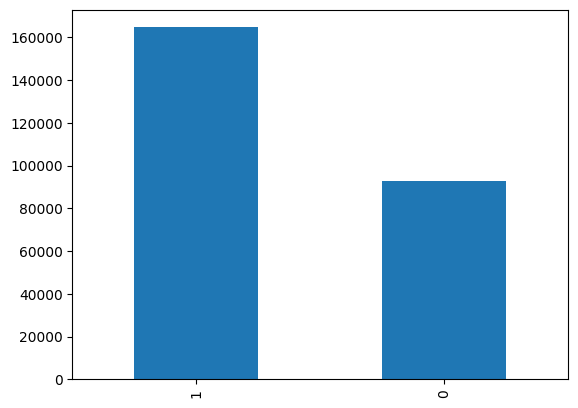

In [22]:
df_cible['label'].value_counts().plot.bar()

#### 5.3 Normalization of the variable *label*

In [23]:
df_cible['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

#### 5.4 Select the *categorical* variables

In [24]:
df_cat = df_cible.select_dtypes(exclude=[np.number])
print(df_cat.columns)

Index(['srcip', 'sport', 'dstip', 'dsport', 'proto', 'service', 'state',
       'attack_cat'],
      dtype='object')


#### 5.5 Histograms graphs for categorical variables according to target variable distribution classes *label*

<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-25-71c594fc424e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_x

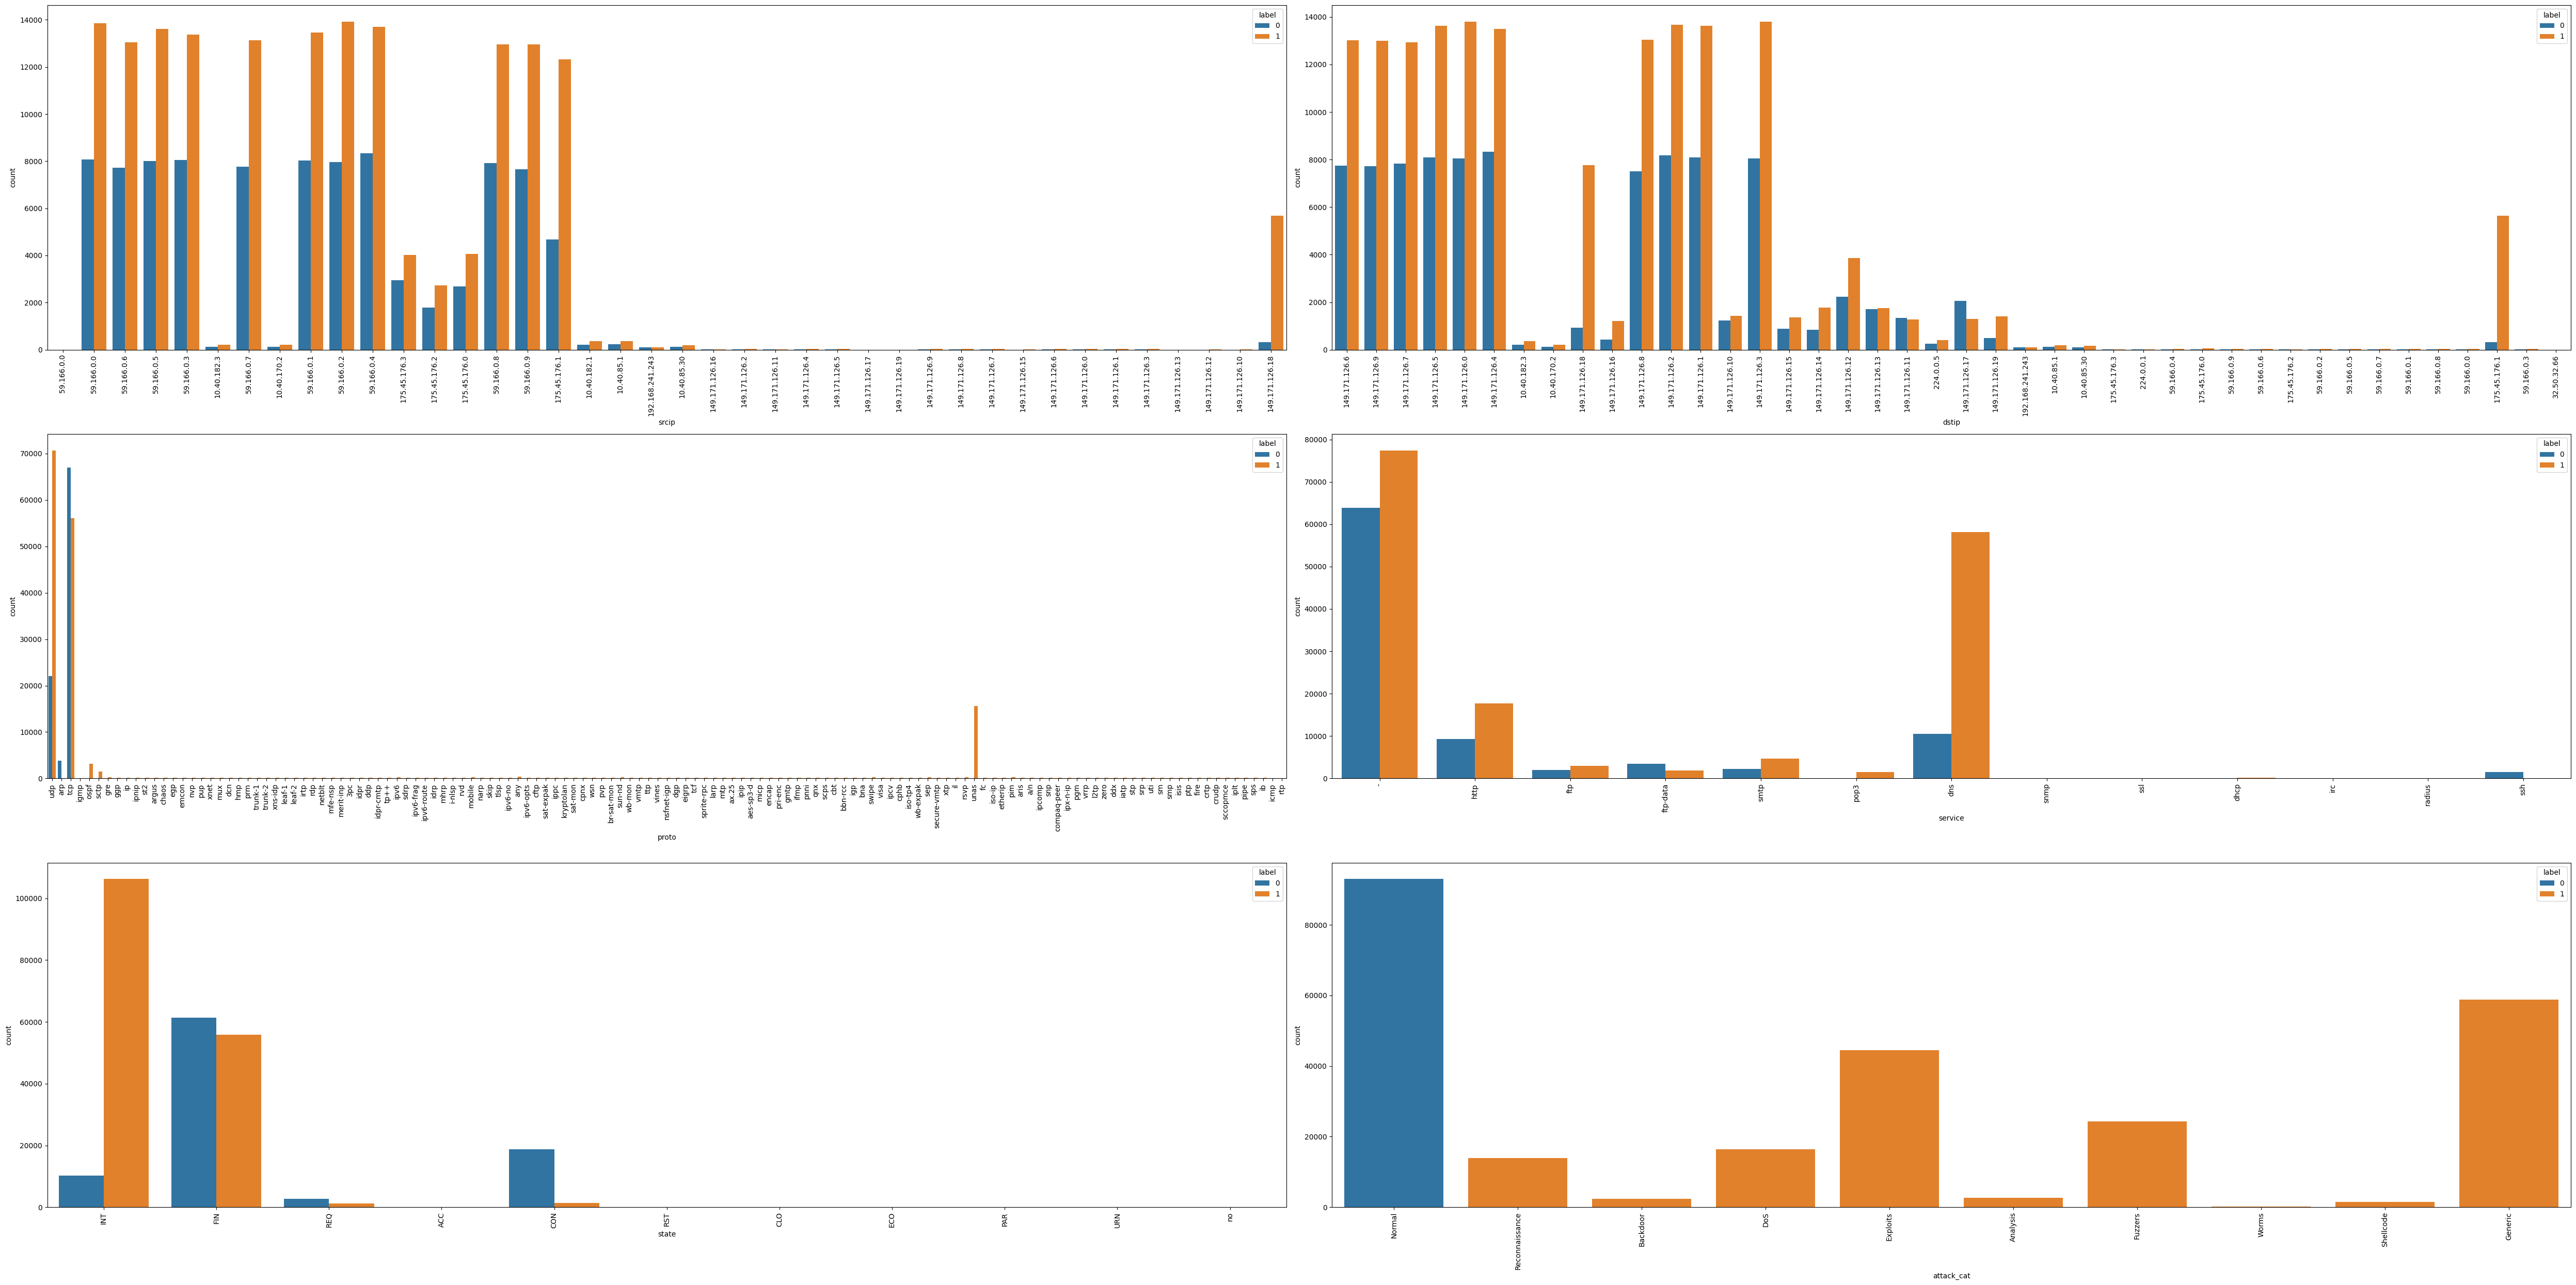

In [25]:
# list of categorical variables to plot
cat_vars = ['srcip', 'dstip', 'proto', 'service', 'state', 'attack_cat']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(50, 25))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='label', data=df_cible, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

#### 5.6 Coding categorical features using LabelEncoder.

#### 5.6.1 Display of our dataframe **data**

In [26]:
data = df_cible
data.head()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,﻿59.166.0.0,1390,149.171.126.6,53,0.000011,udp,-,INT,2,0,...,1,2,0,0,0,1,2,0,Normal,0
1,59.166.0.0,33661,149.171.126.9,1024,0.000008,udp,-,INT,2,0,...,1,2,0,0,0,1,2,0,Normal,0
2,59.166.0.6,1464,149.171.126.7,53,0.000005,udp,-,INT,2,0,...,1,3,0,0,0,1,3,0,Normal,0
3,59.166.0.5,3593,149.171.126.5,53,0.000006,udp,-,INT,2,0,...,1,3,0,0,0,2,3,0,Normal,0
4,59.166.0.3,49664,149.171.126.0,53,0.000010,udp,-,INT,2,0,...,1,3,0,0,0,2,3,0,Normal,0


#### 5.6.2 **data** Information

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 48 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   srcip              257673 non-null  object 
 1   sport              257673 non-null  object 
 2   dstip              257673 non-null  object 
 3   dsport             257673 non-null  object 
 4   dur                257673 non-null  float64
 5   proto              257673 non-null  object 
 6   service            257673 non-null  object 
 7   state              257673 non-null  object 
 8   spkts              257673 non-null  int64  
 9   dpkts              257673 non-null  int64  
 10  sbytes             257673 non-null  int64  
 11  dbytes             257673 non-null  int64  
 12  rate               257673 non-null  float64
 13  sttl               257673 non-null  int64  
 14  dttl               257673 non-null  int64  
 15  sload              257673 non-null  float64
 16  dl

#### 5.6.3 Data after encoding *categorical* variables.

In [28]:
for feature in df_cat.columns:
    data[feature] = LabelEncoder().fit_transform(data[feature])

In [29]:
data.head()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,39,3918,20,25389,0.000011,119,0,5,2,0,...,1,2,0,0,0,1,2,0,6,0
1,29,23593,23,140,0.000008,119,0,5,2,0,...,1,2,0,0,0,1,2,0,6,0
2,35,4670,21,25389,0.000005,119,0,5,2,0,...,1,3,0,0,0,1,3,0,6,0
3,34,25828,19,25389,0.000006,119,0,5,2,0,...,1,3,0,0,0,2,3,0,6,0
4,32,39478,4,25389,0.000010,119,0,5,2,0,...,1,3,0,0,0,2,3,0,6,0


#### 5.7 data correlation

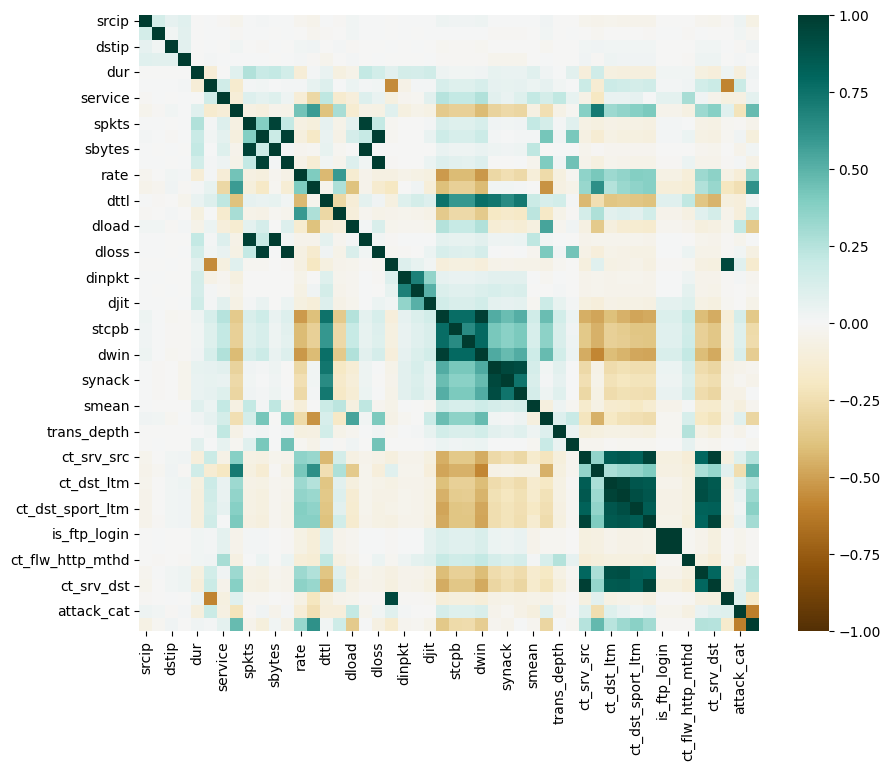

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),vmin=-1, vmax=1,cmap='BrBG')
plt.show()

#### 5.7.1 Display features that have a strong correlation

In [31]:
columns = data.columns.tolist()
corr = data.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.98:
            print(columns[i], columns[j] + ":", corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

sbytes sloss: 0.995771577240686
dbytes dloss: 0.9967111338314709
swin dwin: 0.9804584289136614
is_ftp_login ct_ftp_cmd: 0.9988554882935945


#### 5.7.2 Correlation of variables with Feature *Label* .

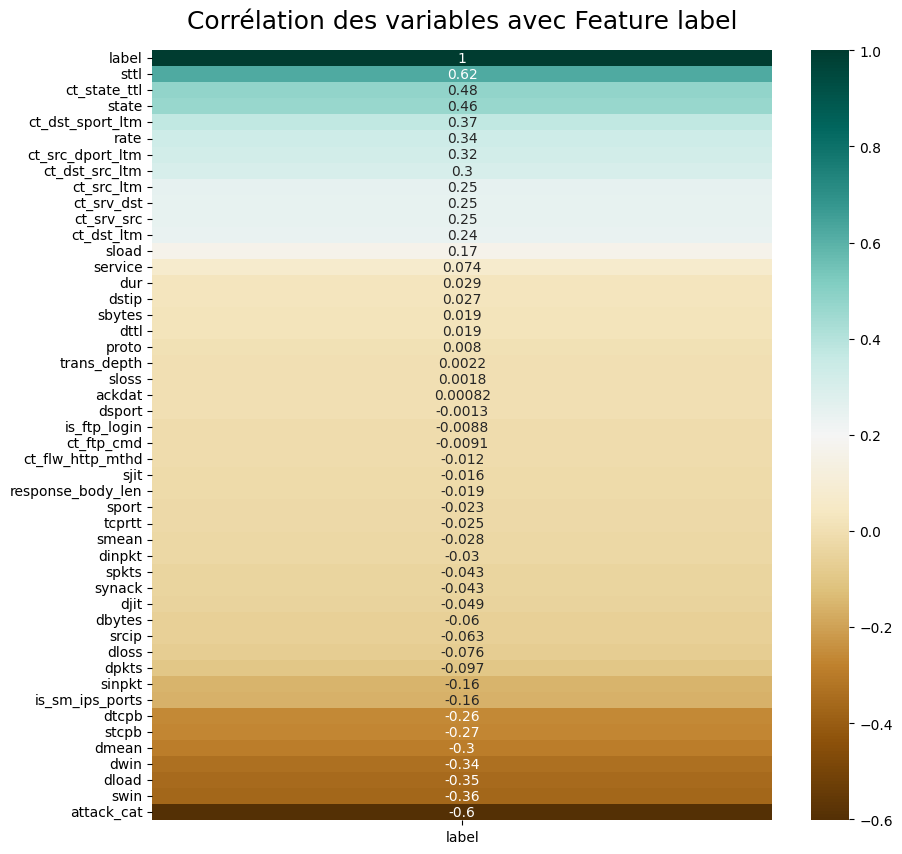

In [32]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['label']].sort_values(by='label', ascending=False), annot=True, cmap='BrBG')
heatmap.set_title('Corrélation des variables avec Feature label', fontdict={'fontsize':18}, pad=16)
plt.show()

#### 5.7.3 Interpretation

The following variables are positively correlated with[Label] cyber attacks:

sttl: Life time value from source to destination.

ct_state_ttl and state: These characteristics reflect the different steps of TCP connections and can be linked to port scans, SYN flood or DDoS attacks.

ct_dst_sport_ltm: This feature measures the number of connections from the same source IP address to the same destination port over a short period of time.

rate: This feature can represent different types of traffic rates or frequencies.

5.7.4 Cloud plans(Scatter Plot) for features that are positively correlated with cyber attacks[label]

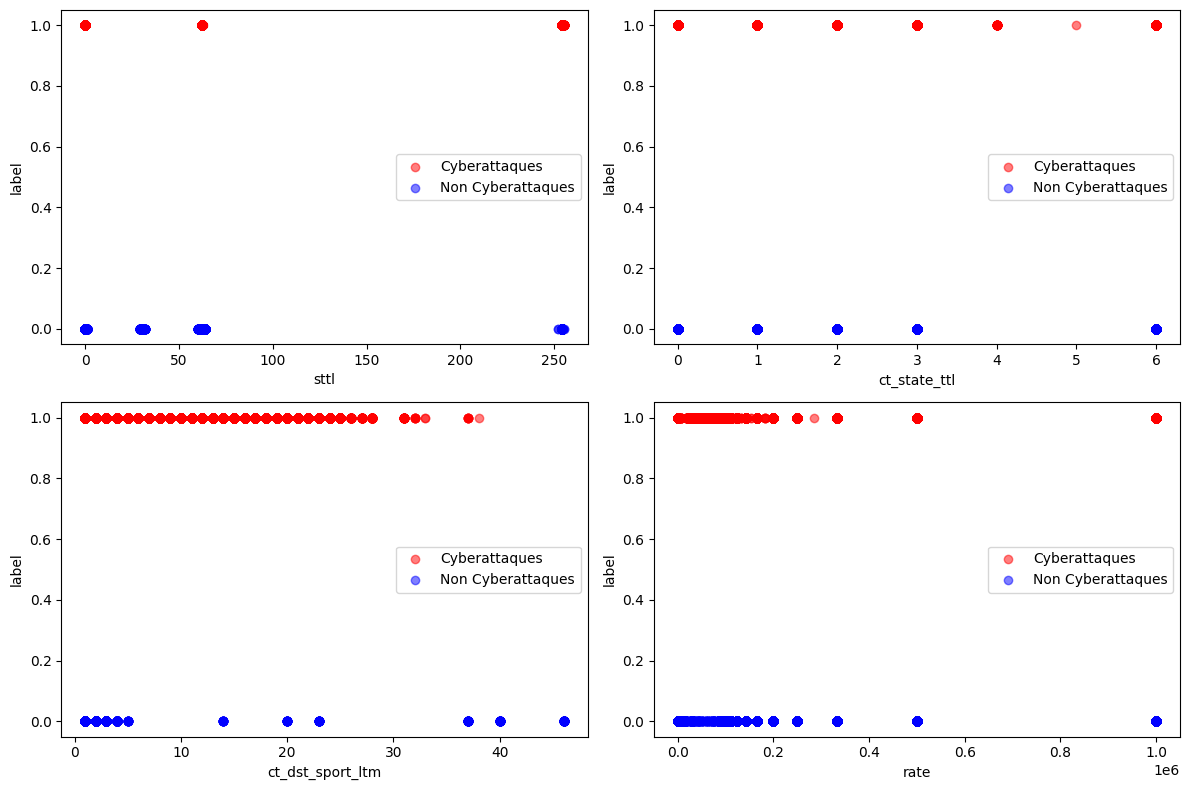

In [33]:
# Sélectionner les caractéristiques d'intérêt
features = ['sttl', 'ct_state_ttl', 'state', 'ct_dst_sport_ltm', 'rate', 'label']

# Créer un sous-ensemble de données avec seulement les caractéristiques sélectionnées
subset = data[features]

# Diviser les données en deux sous-ensembles : cyberattaques et non cyberattaques
cyberattacks = subset[subset['label'] == 1]
non_cyberattacks = subset[subset['label'] == 0]

# Tracer les caractéristiques positives corrélées avec les cyberattaques
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(cyberattacks['sttl'], cyberattacks['label'], color='red', alpha=0.5, label='Cyberattaques')
plt.scatter(non_cyberattacks['sttl'], non_cyberattacks['label'], color='blue', alpha=0.5, label='Non Cyberattaques')
plt.xlabel('sttl')
plt.ylabel('label')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(cyberattacks['ct_state_ttl'], cyberattacks['label'], color='red', alpha=0.5, label='Cyberattaques')
plt.scatter(non_cyberattacks['ct_state_ttl'], non_cyberattacks['label'], color='blue', alpha=0.5, label='Non Cyberattaques')
plt.xlabel('ct_state_ttl')
plt.ylabel('label')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(cyberattacks['ct_dst_sport_ltm'], cyberattacks['label'], color='red', alpha=0.5, label='Cyberattaques')
plt.scatter(non_cyberattacks['ct_dst_sport_ltm'], non_cyberattacks['label'], color='blue', alpha=0.5, label='Non Cyberattaques')
plt.xlabel('ct_dst_sport_ltm')
plt.ylabel('label')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(cyberattacks['rate'], cyberattacks['label'], color='red', alpha=0.5, label='Cyberattaques')
plt.scatter(non_cyberattacks['rate'], non_cyberattacks['label'], color='blue', alpha=0.5, label='Non Cyberattaques')
plt.xlabel('rate')
plt.ylabel('label')
plt.legend()

plt.tight_layout()
plt.show()


#### 5.7.4 Deletion The elements that have strong correlation

In [34]:
data = data.drop(columns=correlated_vars)

In [36]:
print('New dataframe Columns: ',data.shape[1])

New dataframe Columns:  44


#### 6 . Sauvgarde dataframe prè-traiter

In [ ]:
#data.to_csv('UNSW-NB15_Processed.csv',index=False)

## II - Phase Implementation Classification Models

### 1 . UNSW-NB15_Processed.csv playback

In [37]:
#data = pd.read_csv("/content/UNSW-NB15_Processed.csv")
data.head()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,39,3918,20,25389,0.000011,119,0,5,2,0,...,1,1,2,0,0,1,2,0,6,0
1,29,23593,23,140,0.000008,119,0,5,2,0,...,1,1,2,0,0,1,2,0,6,0
2,35,4670,21,25389,0.000005,119,0,5,2,0,...,1,1,3,0,0,1,3,0,6,0
3,34,25828,19,25389,0.000006,119,0,5,2,0,...,2,1,3,0,0,2,3,0,6,0
4,32,39478,4,25389,0.000010,119,0,5,2,0,...,2,1,3,0,0,2,3,0,6,0


### 2 . Create training and test data sets

The Training/Test split consists of dividing the dataset into training and test sets respectively, which are mutually exclusive. Then you train with the training set and test with the test set. This provides a more accurate assessment of out-of-sample accuracy, as the test set is not part of the data set used to form the model. Therefore, it gives us a better understanding of the ability of our model to generalize to new data.

We know the result of each data point in the test set, making it ideal for testing! Since these data were not used to form the model, the model has no knowledge of the outcome of these data points. So in essence, it’s really an off-sample test.

Let’s now divide our dataset into training and test sets. About 70% of the complete data set will be used for training and 30% for testing.

In [38]:
X = data.drop(columns=['label'])
feature_list = list(X.columns)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
print(f"The features after splitting the UNSWB-NB_15 Drive and Test Set are :", X_train.shape,
      y_train.shape, X_test.shape, y_test.shape)

The features after splitting the UNSWB-NB_15 Drive and Test Set are : (180371, 43) (180371,) (77302, 43) (77302,)


### 3 . Model training.



In [40]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] = RandomForestClassifier()
models['Gaussian Naive Bayes'] = GaussianNB()

In [41]:
train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time

    y_pred[key] = models[key].predict(X_test)

    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])

Let’s try feature selection using recursive feature elimination. (RFE)

In [42]:
rfc_rfe = 'Random Forest Classifier + Recursive Feature Elimination'
models[rfc_rfe] = RandomForestClassifier()
rfe = RFE(models[rfc_rfe])
start_time = time.time()
rfe.fit(X_train, y_train)
training_time[rfc_rfe] = time.time() - start_time

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

start_time = time.time()
models[rfc_rfe].fit(X_train_rfe, y_train)
training_time[rfc_rfe] = training_time[rfc_rfe] + (time.time() - start_time)

y_pred[key] = models[rfc_rfe].predict(X_test_rfe)

train_score[rfc_rfe] = models[rfc_rfe].score(X_train_rfe, y_train)
accuracy[rfc_rfe] = models[rfc_rfe].score(X_test_rfe, y_test)
precision[rfc_rfe] = precision_score(y_test, y_pred[key])
recall[rfc_rfe] = recall_score(y_test, y_pred[key])

In [43]:
print("Old number of features:", X.shape[1])
print("New number of features:", len(rfe.estimator_.feature_importances_))

Old number of features: 43
New number of features: 21


### 4 . Model comparison

Evaluation:

For each model[Decision Tree Classifier, Random Forest Classifier, Gaussian Naive Bayes, Random Forest Classifier + Recursive Feature Elimination], we will use specific evaluation metrics to evaluate the performance of the model. The evaluation metrics for the models we discussed are:


Training Score: It represents the score or model accuracy on the training data.

Accuracy Score: This is the percentage of correct predictions relative to the total number of samples.

Precision: It measures the accuracy of positive predictions against all positive and negative predictions.

Recall: It measures the model’s ability to find all positive instances.

Training Time: It measures the time it takes to train the model on the training data.

In [44]:
df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

In [45]:
df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,1.000000,1.000000,1.000000,1.000000,1.743813
Random Forest Classifier,1.000000,1.000000,1.000000,1.000000,35.606500
Gaussian Naive Bayes,0.765866,0.767419,0.794475,0.858273,0.186196
Random Forest Classifier + Recursive Feature Elimination,1.000000,1.000000,1.000000,1.000000,620.825158


Comparing the models presented with the following observations:

**Decision Tree Classifier and **Random Forest Classifier: Both models achieved near-perfect performance on all metrics, including accuracy, accuracy and recall. This suggests that they were able to correctly predict all the examples in the test data set. The Decision Tree Classifier may have required less practice time compared to the Random Forest Classifier.

**Gaussian Naive Bayes: This model scored slightly lower than the previous two models. Although it achieved an accuracy, recall and accuracy of about 0.76, these values are lower than those of other models. However, he still managed to predict the majority of positive examples in the data set.

**Random Forest Classifier + Recursive Feature Elimination: This model performed perfectly on all metrics, as did the Decision Tree Classifier and the Random Forest Classifier. However, it is important to note that this model required much more training time (579.776430 units) compared to other models. If speed of training is an important consideration, other models might be preferable.

Based on these results, the decision tree (Decision Tree Classifier) and random forest (Random Forest Classifier) models seem to be good choices, because they achieved almost perfect performance while requiring less training time compared to the Random Forest Classifier + Recursive Feature Elimination model.

### 5 . Performence de Model Decision Tree Classifier

#### 5.1 Roc_Curve

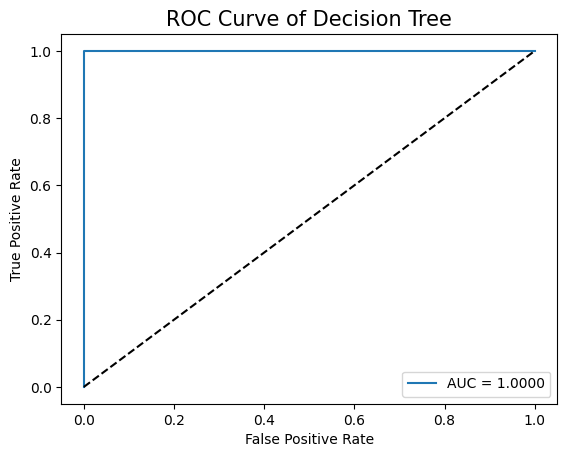

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = models['Decision Tree Classifier'].predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Decision Tree', size = 15)
plt.legend()

#### 5.2 Recall_Curve

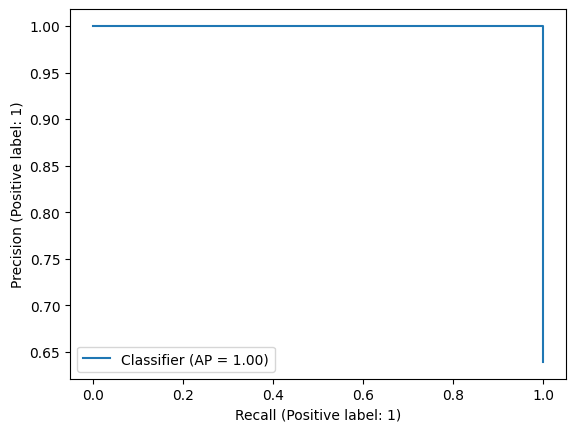

In [47]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Decision Tree Classifier'])

#### 5.3 Confusion matrix for Decision Tree Classifier

Decision Tree Classifier : 


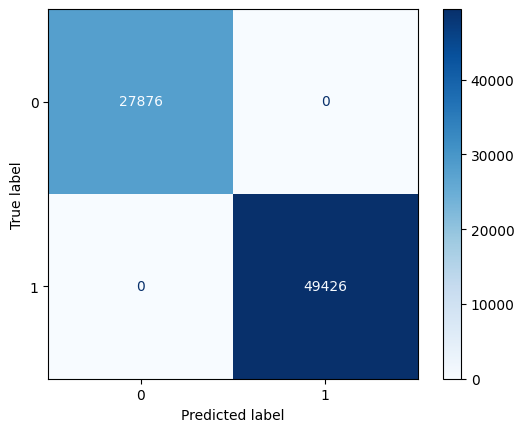

In [48]:
print('Decision Tree Classifier : ')
cm = confusion_matrix(y_test, y_pred['Decision Tree Classifier'], labels=models['Decision Tree Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Decision Tree Classifier'].classes_)
disp.plot(cmap='Blues')
plt.show()

### 6 . Performance by Model Random Forset

#### 6.1 Roc-Curve

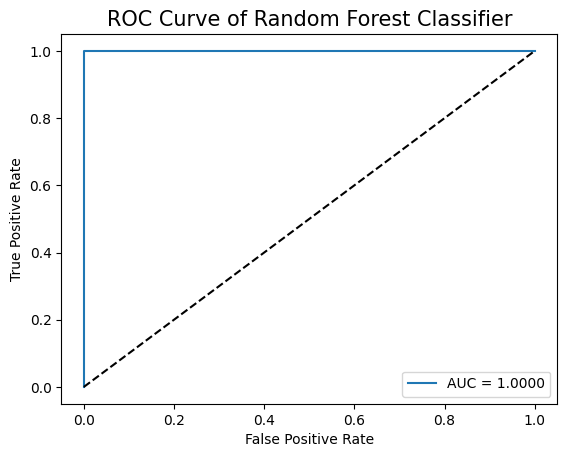

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = models['Random Forest Classifier'].predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Random Forest Classifier', size = 15)
plt.legend()

#### 6.2 Recall Curve

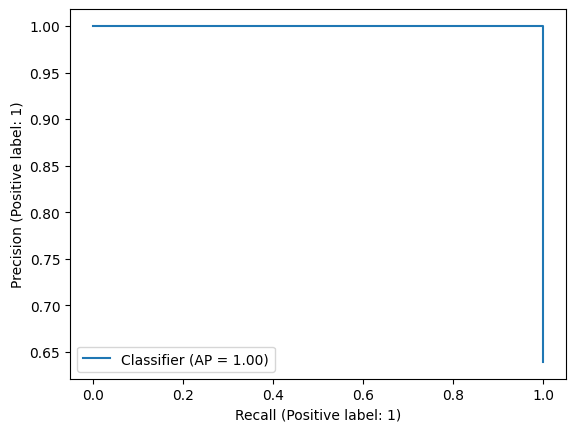

In [50]:
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred['Random Forest Classifier'])

#### 6.3 Matrice confusion pour Random Forest Classifier

Random Forest Classifier : 


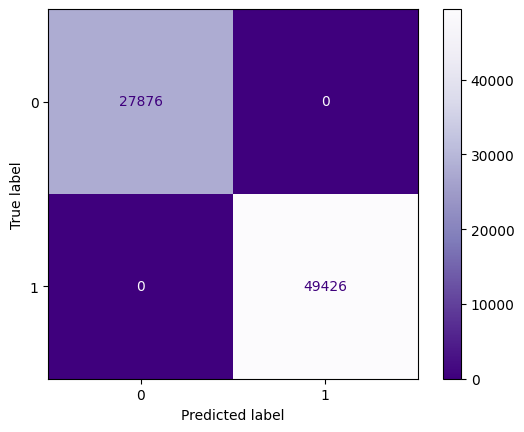

In [51]:
print('Random Forest Classifier : ')
cm = confusion_matrix(y_test, y_pred['Random Forest Classifier'], labels=models['Random Forest Classifier'].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models['Random Forest Classifier'].classes_)
disp.plot(cmap='Purples_r')
plt.show()

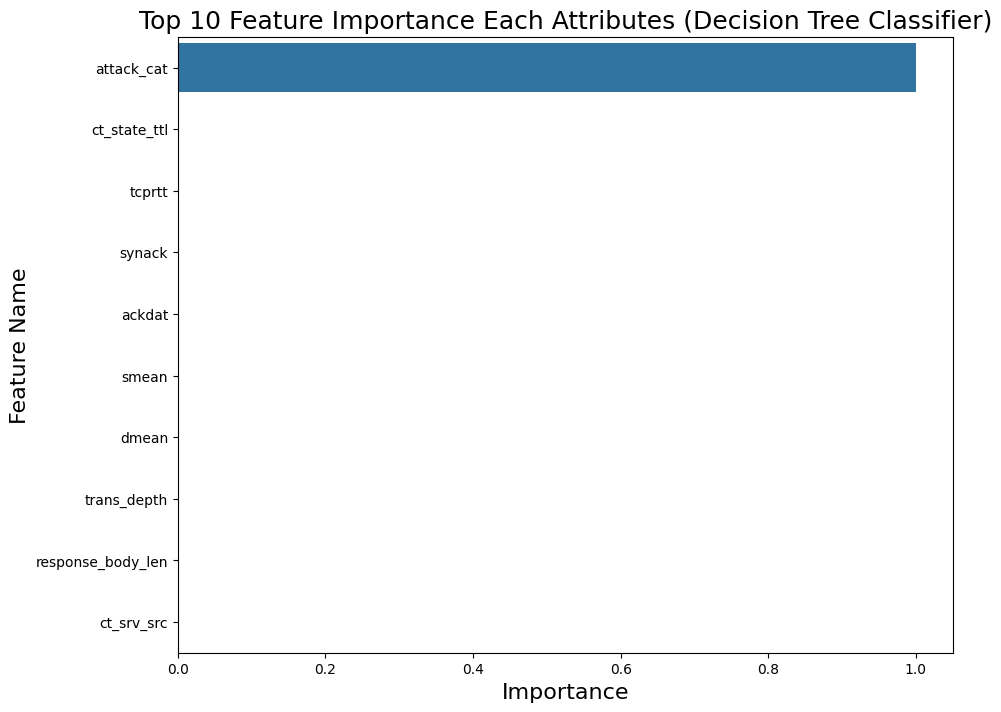

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": models['Decision Tree Classifier'].feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree Classifier)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

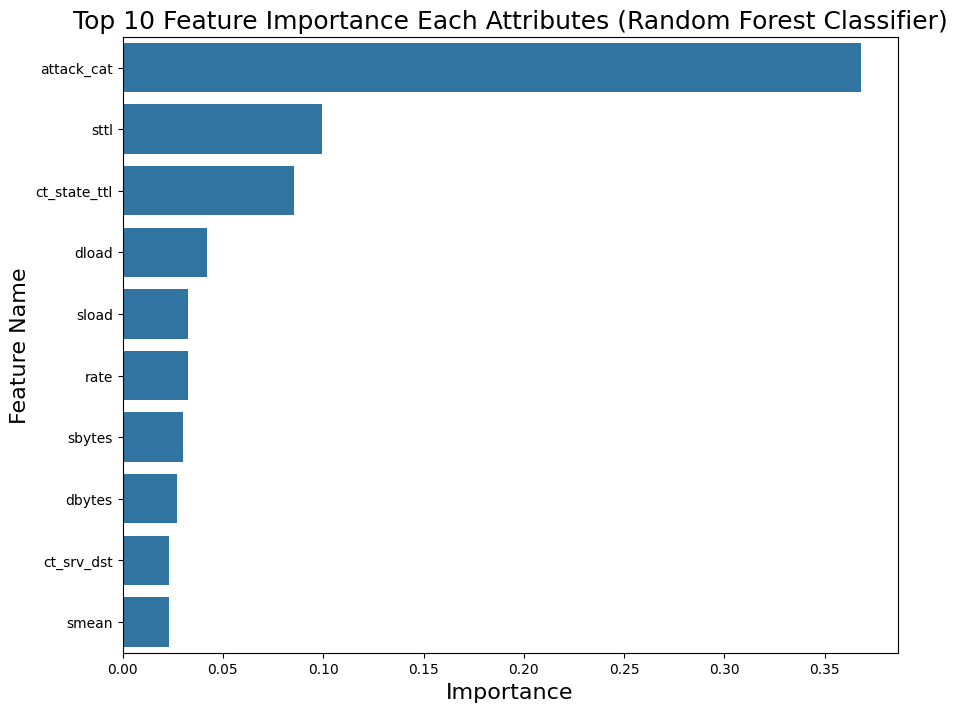

In [53]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": models['Random Forest Classifier'].feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest Classifier)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

##Section 2: Predection with the Attack Category Feature

###Visualisation Catégorie d'Attaque

In [54]:
df = pd.read_csv('/content/UNSW_NB15Data/New_UNSW-NB15_1.csv', dtype={'sport':str, 'dsport':str, 'attack_cat':str})
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,﻿59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

In [56]:
for col in ['srcip', 'dstip', 'proto', 'service', 'state']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [57]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,40,1390,22,53,120,2,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,30,33661,25,1024,120,2,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,36,1464,23,53,120,2,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,35,3593,21,53,120,2,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,33,49664,6,53,120,2,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


Generic           7522
Exploits          5409
 Fuzzers          5051
Reconnaissance    1759
DoS               1167
Backdoors          534
Analysis           526
Shellcode          223
Worms               24
Name: attack_cat, dtype: int64


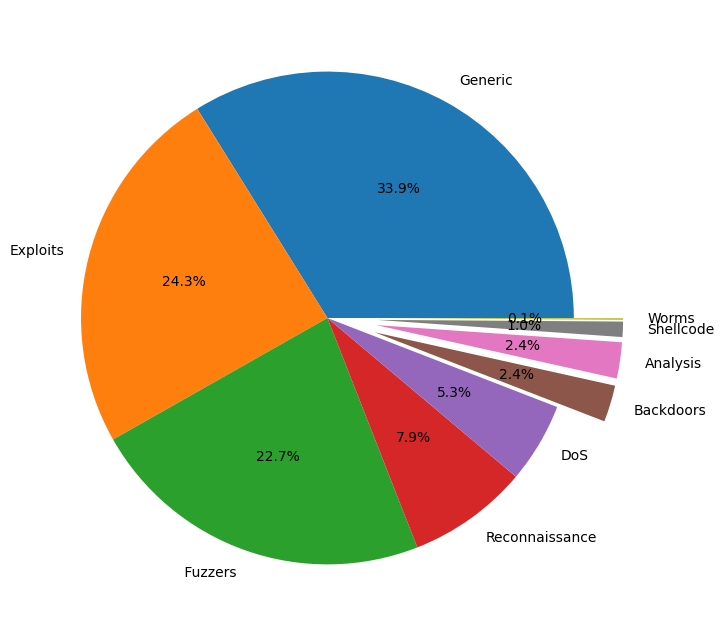

In [58]:
validAttacks = df[df['Label']==1]['attack_cat'].value_counts()
print(validAttacks)
plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2])
plt.show()

###Divisionnement données

In [ ]:
X = df.drop(columns = ['attack_cat', 'Label'])
y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (490000, 47)
y_train shape:  (490000,)
X_test shape:  (210001, 47)
y_test shape:  (210001,)


## **L'objectif : Prevention l'attaque avec differents méthodes**

  1-Méthode pour bloquer l'accès

  2-Méthode pour déclencher une alerte

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 175340
Data columns (total 43 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   srcip              257673 non-null  int64  
 1   sport              257673 non-null  int64  
 2   dstip              257673 non-null  int64  
 3   dsport             257673 non-null  int64  
 4   dur                257673 non-null  float64
 5   proto              257673 non-null  int64  
 6   service            257673 non-null  int64  
 7   state              257673 non-null  int64  
 8   spkts              257673 non-null  int64  
 9   dpkts              257673 non-null  int64  
 10  sbytes             257673 non-null  int64  
 11  dbytes             257673 non-null  int64  
 12  rate               257673 non-null  float64
 13  sttl               257673 non-null  int64  
 14  dttl               257673 non-null  int64  
 15  sload              257673 non-null  float64
 16  dl

In [ ]:
X.tail()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
175336,35,12118,21,31641,0.000009,119,2,5,2,0,...,24,24,13,24,0,0,24,24,0,5
175337,37,5808,5,2236,0.505762,113,0,4,10,8,...,1,1,1,2,0,0,1,1,0,8
175338,37,25465,17,430,0.000009,119,2,5,2,0,...,3,3,3,13,0,0,3,12,0,5
175339,34,731,20,2632,0.000009,119,2,5,2,0,...,30,30,14,30,0,0,30,30,0,5
175340,30,50189,23,33458,0.000009,119,2,5,2,0,...,30,30,16,30,0,0,30,30,0,5


In [ ]:
X_test.head()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
151687,24,3565,10,33458,0.000008,119,2,5,2,0,...,16,16,16,16,0,0,16,16,0,5
81014,36,21146,19,25389,0.696310,113,5,4,10,8,...,1,1,1,2,0,1,1,2,0,3
44795,35,37925,21,24201,0.557756,113,5,4,10,6,...,1,2,1,1,0,1,3,5,0,4
78150,25,16944,8,10003,0.000006,120,0,5,2,0,...,1,1,1,5,0,0,9,5,0,3
144831,14,415,25,25389,0.536892,113,0,4,22,10,...,17,1,1,3,0,0,1,3,0,4


In [ ]:
y_pred

{'Decision Tree Classifier': array([1, 1, 1, ..., 1, 1, 1]),
 'Random Forest Classifier': array([1, 1, 1, ..., 1, 1, 1]),
 'Gaussian Naive Bayes': array([1, 1, 1, ..., 1, 1, 1])}

Mettre y_pred['Decision Tree Classifier'] sous forme tableau

In [ ]:
y_pred['Decision Tree Classifier'] = np.array(y_pred['Decision Tree Classifier'])
y_pred['Decision Tree Classifier']

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
X_test.head()

,srcip,sport,dstip,dsport,dur,proto,service,state,spkts,dpkts,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat
151687,24,3565,10,33458,0.000008,119,2,5,2,0,...,16,16,16,16,0,0,16,16,0,5
81014,36,21146,19,25389,0.696310,113,5,4,10,8,...,1,1,1,2,0,1,1,2,0,3
44795,35,37925,21,24201,0.557756,113,5,4,10,6,...,1,2,1,1,0,1,3,5,0,4
78150,25,16944,8,10003,0.000006,120,0,5,2,0,...,1,1,1,5,0,0,9,5,0,3
144831,14,415,25,25389,0.536892,113,0,4,22,10,...,17,1,1,3,0,0,1,3,0,4


In [ ]:
# Prévention des attaques

# Fonction pour prévenir les attaques en fonction des prédictions du modèle
def prevent_attack():
    def extract_attacker_ips(df, y_pred):
        # Copier X_test pour conserver les données d'origine
        df_decoded = df.copy()

        # Instancier le LabelEncoder pour srcip
        label_encoder = LabelEncoder()

        # Décoder la fonction srcip
        df_decoded['srcip'] = label_encoder.inverse_transform(df_decoded['srcip'])

        # Filtrer les lignes correspondantes aux prédictions de 1 pour 'Decision Tree Classifier'
        attacker_indices = df.loc[y_pred['Decision Tree Classifier'] == 1].index.tolist()

        # Extraire les adresses IP des attaquants pour chaque indice
        attacker_ips = df.loc[attacker_indices, 'srcip'].tolist()

        # Retourner la liste des adresses IP des attaquants
        return attacker_ips

    attacker_ips = extract_attacker_ips(X_test, y_pred)

# Méthode pour bloquer l'accès basé sur l'adresse IP
    import ipaddress
    def block_ip(attacker_ip):
        #addr = ipaddress.ip_address(attacker_ip)
        print(f"Accès bloqué pour l'adresse IP : {attacker_ip}")

    for attacker_ip in attacker_ips:
        block_ip(attacker_ip)

# Méthode pour déclencher une alerte
    import smtplib
    from email.mime.text import MIMEText
    from email.mime.multipart import MIMEMultipart
    def send_alert_email(subject, body, recipient_email):

      # Configuration des informations d'authentification SMTP
        smtp_server = "smtp.office365.com"
        smtp_port = 587
        smtp_username = "user100200@outlook.fr"
        smtp_password = "'password"

      # Configuration des adresses e-mail
        sender_email = "user100200@outlook.fr"
      # Création de l'objet e-mail
        message = MIMEMultipart()
        message["From"] = sender_email
        message["To"] = recipient_email
        message["Subject"] = subject

        #Connexion au serveur SMTP et Effectuer l'envoi ici
        with smtplib.SMTP(smtp_server, smtp_port) as server:
          server.starttls()
          server.login(smtp_username, smtp_password)
          server.send_message(message)
    #Envoi d'un e-mail d'alerte pour chaque adresse IP d'attaquant
    for attacker_ip in attacker_ips:
        subject = "Alerte de sécurité - Attaque détectée"
        body = f"Une attaque a été détectée en provenance de l'adresse IP : {attacker_ip}. Veuillez prendre les mesures nécessaires."
        recipient_email = "user200200@outlook.fr"

        send_alert_email(subject, body, recipient_email)

In [ ]:
prevent_attack()

In [ ]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
def send_alert_email(subject, body, recipient_email):
    # Configuration des informations d'authentification SMTP
    smtp_server = "smtp.office365.com"
    smtp_port = 587
    smtp_username = "user100200@outlook.fr"
    smtp_password = "password"

    # Configuration des adresses e-mail
    sender_email = "user100200@outlook.fr"
    # Création de l'objet e-mail
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = recipient_email
    message["Subject"] = subject

    # Ajout du corps du message
    message.attach(MIMEText(body, "plain"))

    # Connexion au serveur SMTP et envoi de l'e-mail
    with smtplib.SMTP(smtp_server, smtp_port) as server:
        server.starttls()
        server.login(smtp_username, smtp_password)
        server.send_message(message)
    # Envoi d'un e-mail d'alerte pour chaque adresse IP d'attaquant
    #for ip in attacker_ips:
subject = "Alerte de sécurité - Attaque détectée"
body = f"Une attaque a été détectée en provenance de l'adresse IP : '123.45.67.0'. Voici les détails suivante : "
recipient_email = "user200200@outlook.fr"
send_alert_email(subject, body, recipient_email)

Cool ✊
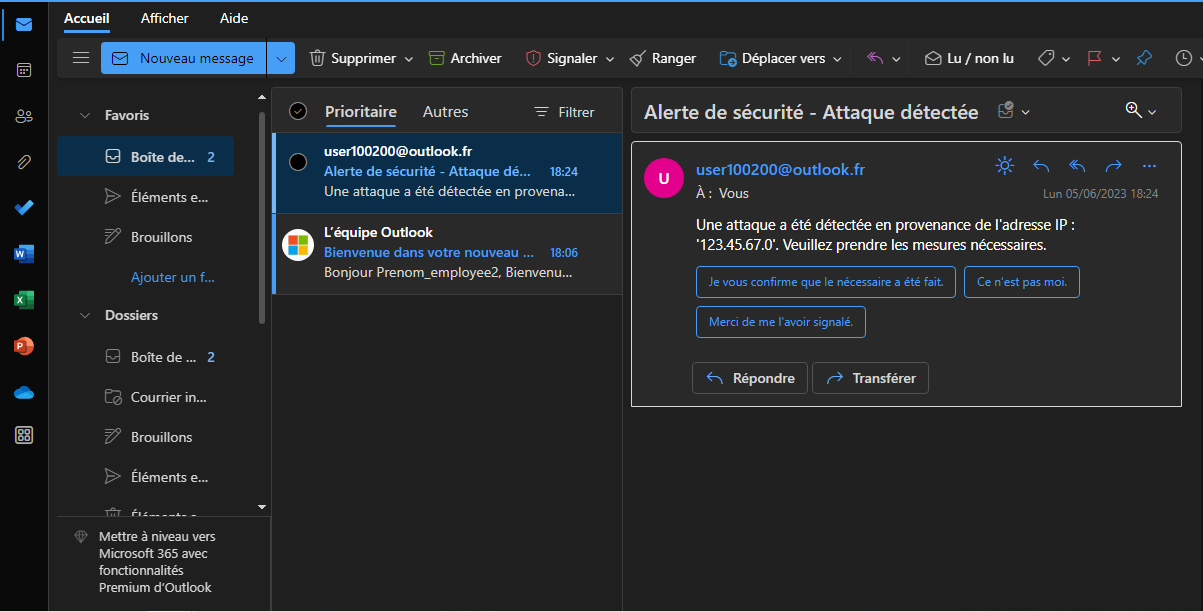

3 - Méthode pour enregistrer une alerte dans un fichier journal :

In [ ]:
import logging

def log_alert(alert_message):
    # Configuration du logger
    logging.basicConfig(filename='/content/alert.log', level=logging.INFO, format='%(asctime)s - %(message)s')

    # Enregistrement de l'alerte dans le fichier journal
    logging.info(alert_message)

# Exemple d'utilisation
alert_message = "Une attaque a été détectée sur le système. Veuillez prendre les mesures nécessaires."
log_alert(alert_message)


In [ ]:
import pandas as pd

def log_alert(alert_message, alert_table):
    # Création d'un DataFrame avec les données de l'alerte
    alert_data = {'Timestamp': pd.Timestamp.now(), 'Message': alert_message}
    alert_df = pd.DataFrame(alert_data, index=[0])

    # Ajout de l'alerte au tableau d'alertes
    alert_table = alert_table.append(alert_df, ignore_index=True)

    # Retourner le tableau d'alertes mis à jour
    return alert_table

# Exemple d'utilisation
alert_message = "Une attaque a été détectée sur le système. Veuillez prendre les mesures nécessaires."

# Création du tableau d'alertes (s'il n'existe pas déjà)
alert_table = pd.DataFrame(columns=['Timestamp', 'Message'])

# Enregistrement de l'alerte dans le tableau d'alertes
alert_table = log_alert(alert_message, alert_table)

# Affichage du tableau d'alertes mis à jour
alert_table.head()


<ipython-input-2-6515cc57b731>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alert_table = alert_table.append(alert_df, ignore_index=True)


,Timestamp,Message
0,2023-06-05 19:08:42.480042,Une attaque a été détectée sur le système. Veu...
